# Estudo para criação de um modelo de ML

Para prever o preço de venda de um carro, vamos analisar quais features são mais relevantes para o modelo de regressão.

### Bibliotecas usadas

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

#### Input dataset 

In [7]:
auto = pd.read_csv('C:/Users/admin/PythonAnalytics/projects/python/datasets/auto_raw.csv', index_col = 0)

In [8]:
auto.sample(5).T

,131,139,44,16,84
symboling,2,2,1,0,3
normalized-losses,?,83,?,?,?
make,renault,subaru,isuzu,bmw,mitsubishi
fuel-type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,turbo
num-of-doors,two,two,two,two,two
body-style,hatchback,hatchback,sedan,sedan,hatchback
drive-wheels,fwd,fwd,fwd,rwd,fwd
engine-location,front,front,front,front,front
wheel-base,96.1,93.7,94.5,103.5,95.9


In [9]:
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [10]:
auto.shape

(205, 26)

In [11]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Vemos que os pontos de ? são representações de NaN. Portanto devemos aqui codifica-los apropriadamente.

In [15]:
# replace "?" por NaN
auto.replace("?", np.nan, inplace = True)
auto.sample(5).T

,76,129,123,33,167
symboling,2,1,-1,1,2
normalized-losses,161,NaN,74,101,134
make,mitsubishi,porsche,plymouth,honda,toyota
fuel-type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
num-of-doors,two,two,four,two,two
body-style,hatchback,hatchback,wagon,hatchback,hardtop
drive-wheels,fwd,rwd,fwd,fwd,rwd
engine-location,front,front,front,front,front
wheel-base,93.7,98.4,103.3,93.7,98.4


### Verificar a quantidade de missing data

In [17]:
auto.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [18]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

### Análise de completude e tipos de variáveis

In [22]:
#Criando um dataframe auxliar para analisar a consistencia das variaveis
cons = pd.DataFrame({
                    'colunas'  : auto.columns,
                    'tipo'     : auto.dtypes,
                    'missing'  : auto.isna().sum(),
                    'size'     : auto.shape[0],
                    'unicos'   : auto.nunique()
})

cons['percentual'] = round(cons['missing'] / cons['size'],3)

cons.head(26)

,colunas,tipo,missing,size,unicos,percentual
symboling,symboling,int64,0,205,6,0.00
normalized-losses,normalized-losses,object,41,205,51,0.20
make,make,object,0,205,22,0.00
fuel-type,fuel-type,object,0,205,2,0.00
aspiration,aspiration,object,0,205,2,0.00
num-of-doors,num-of-doors,object,2,205,2,0.01
body-style,body-style,object,0,205,5,0.00
drive-wheels,drive-wheels,object,0,205,3,0.00
engine-location,engine-location,object,0,205,2,0.00
wheel-base,wheel-base,float64,0,205,53,0.00


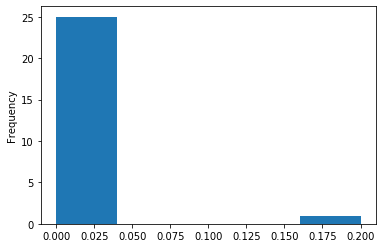

In [23]:
cons.percentual.plot.hist(bins = 5)

### Análise das variaveis com dados missing

In [24]:
print('Contagem de colunas com ATÉ 20% de dados faltantes', cons[cons.percentual < 0.2].shape[0])
print('Contagem de colunas com 0% de dados faltantes',  cons[cons.percentual == 0].shape[0])

Contagem de colunas com ATÉ 20% de dados faltantes 25
Contagem de colunas com 0% de dados faltantes 19


In [25]:
cons[cons.percentual == 0]['tipo'].value_counts()

object     9
float64    5
int64      5
Name: tipo, dtype: int64

Colunas inteiras devem ser descartadas caso a maioria dos dados estejam ausentes. Em nosso dataset, nenhuma das colunas está vazia o suficiente, menos de 20% dos dados estão faltando, logo não iremos dropar nenhuma coluna.
Nós temos liberdade para escolher quais métodos aplicar aos dados faltantes. Iremos aplicar cada método a cada tipo de coluna.

<b>Substituir pela média:</b>
<ul>
    <li>"normalized-losses": 41 missing data, substituir pela média</li>
    <li>"stroke": 4 missing data, substituir pela média</li>
    <li>"bore": 4 missing data, substituir pela média</li>
    <li>"horsepower": 2 missing data, substituir pela média</li>
    <li>"peak-rpm": 2 missing data, substituir pela média</li>
</ul>

<b>Substituir pela frequência(moda):</b>
<ul>
    <li>"num-of-doors": 2 missing data, substituir por  "four". 
        <ul>
            <li>Reason: 84% dos sedans tem "four" portas. Como aqui "four" é a moda, é o valor que possívelmente irá ocorrer</li>
        </ul>
    </li>
</ul>

<b>Dropar a linha inteira:</b>
<ul>
    <li>"price": 4 missing data, simplesmente dropar a linha inteira
        <ul>
            <li>Razão: price é o que queremos predizer. É a variável target. Nenhuma amostra(linha) sem "price" não pode ser usada para predição; portanto nenhuma linha sem preço não é útil para nós.</li>
        </ul>
    </li>
</ul>

#### Substituindo as colunas numéricas que tem dados faltantes pelas médias 

In [27]:
avg_norm_loss = auto["normalized-losses"].astype("float").mean(axis=0) # axis = 0 linhas
auto["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

avg_bore=auto['bore'].astype('float').mean(axis=0)
auto["bore"].replace(np.nan, avg_bore, inplace=True)

avg_horsepower = auto['horsepower'].astype('float').mean(axis=0)
auto['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

avg_peakrpm=auto['peak-rpm'].astype('float').mean(axis=0)
auto['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

In [30]:
auto['num-of-doors'].value_counts()   # variável categórica

four    114
two      89
Name: num-of-doors, dtype: int64

In [34]:
#replace the missing 'num-of-doors' values by the most frequent 
auto["num-of-doors"].replace(np.nan, "four", inplace=True)

In [35]:
# Simplesmente dropando toda a linha aonde a variável target tem valor NaN na coluna "price"
auto.dropna(subset = ['price'], axis = 0, inplace = True)

# resetando o index, pq teve linhas que foram descartadas
auto.reset_index(drop = True, inplace = True)

In [36]:
auto.sample(10).T

,122,191,184,59,101,22,0,45,149,169
symboling,3,-1,2,0,3,1,3,0,0,-1
normalized-losses,186,74,94,115,194,118,122,122,77,65
make,porsche,volvo,volkswagen,mazda,nissan,dodge,alfa-romero,jaguar,toyota,toyota
fuel-type,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std,turbo,std,std,std,std
num-of-doors,two,four,four,four,two,two,two,four,four,four
body-style,hatchback,wagon,sedan,sedan,hatchback,hatchback,convertible,sedan,wagon,sedan
drive-wheels,rwd,rwd,fwd,fwd,rwd,fwd,rwd,rwd,fwd,fwd
engine-location,front,front,front,front,front,front,front,front,front,front
wheel-base,94.5,104.3,97.3,98.8,91.3,93.7,88.6,113,95.7,102.4


In [37]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [38]:
auto.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Agora temos todo o dataset sem dados faltantes, vamos então verificar se os tipos estão corretos.

In [41]:
print(auto.dtypes)

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


In [43]:
auto[["bore", "stroke"]] = auto[["bore", "stroke"]].astype("float")
auto[["normalized-losses"]] = auto[["normalized-losses"]].astype("int")
auto[["price"]] = auto[["price"]].astype("float")
auto[["peak-rpm"]] = auto[["peak-rpm"]].astype("float")

In [44]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int32  
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [45]:
auto.head().T

,0,1,2,3,4
symboling,3,3,1,2,2
normalized-losses,122,122,122,164,164
make,alfa-romero,alfa-romero,alfa-romero,audi,audi
fuel-type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
num-of-doors,two,two,two,four,four
body-style,convertible,convertible,hatchback,sedan,sedan
drive-wheels,rwd,rwd,rwd,fwd,4wd
engine-location,front,front,front,front,front
wheel-base,88.6,88.6,94.5,99.8,99.4


## Análise exploratória

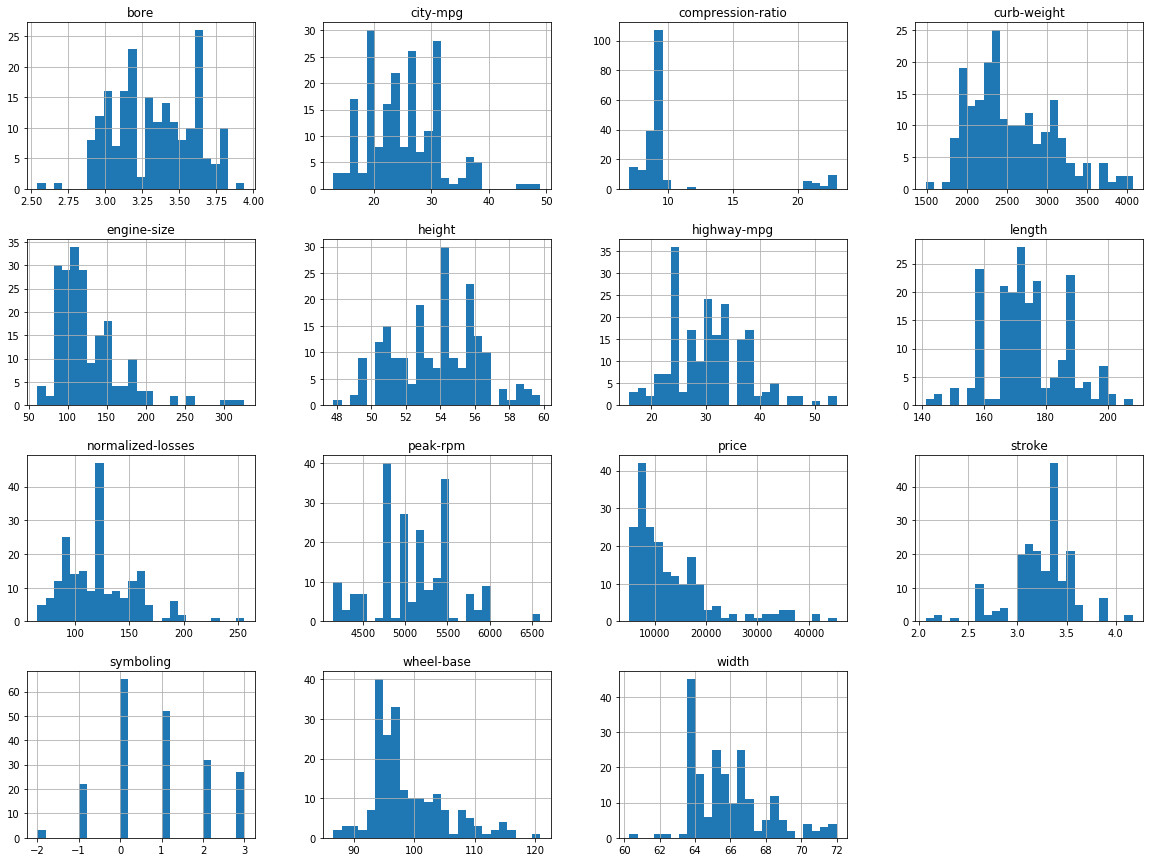

<Figure size 432x288 with 0 Axes>

In [52]:
auto.hist(bins = 25, figsize = (20, 15))
plt.show()
plt.clf()

### Features Numericas

In [53]:
auto_num = auto.select_dtypes(include = [np.number])
print(auto_num.columns)

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')


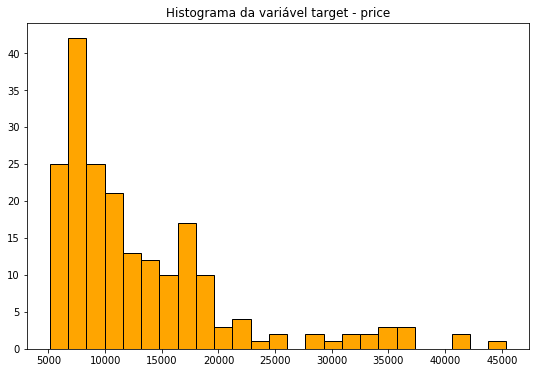

<Figure size 432x288 with 0 Axes>

In [60]:
fig, ax = plt.subplots(figsize = (9, 6))
ax.hist(auto['price'], bins = 25, color = 'orange', edgecolor = 'k')
ax.set_title('Histograma da variável target - price')
plt.show()
plt.clf()

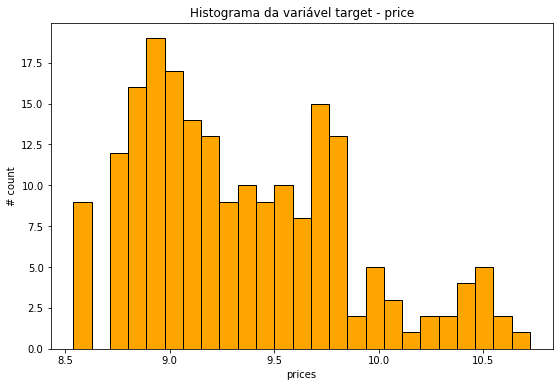

<Figure size 432x288 with 0 Axes>

In [63]:
fig, ax = plt.subplots(figsize = (9, 6))
ax.hist(np.log(auto['price']), bins = 25, color = 'orange', edgecolor = 'k')
ax.set_title('Histograma da variável target - price')
ax.set_xlabel('prices')
ax.set_ylabel('# count')
plt.show()
plt.clf()

### Visualizando relações

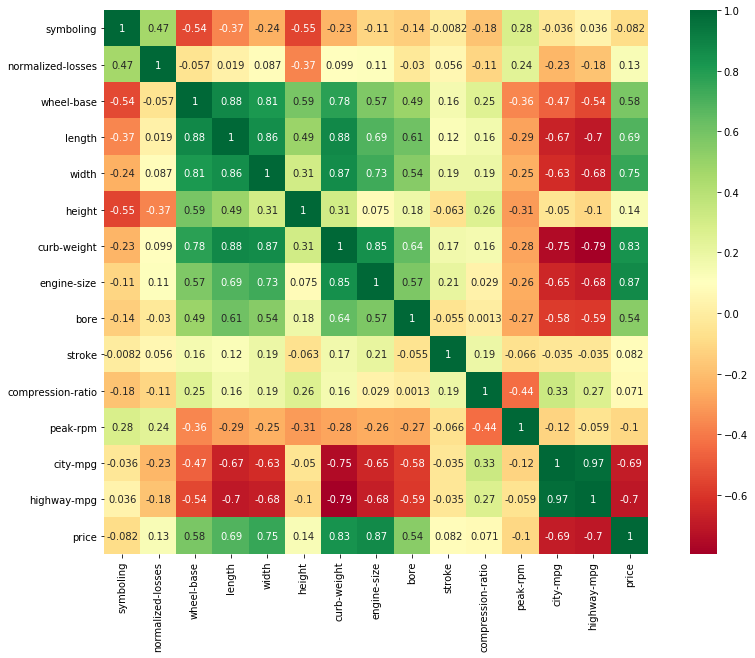

<Figure size 432x288 with 0 Axes>

In [64]:
fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(auto_num.corr(), square=True, cmap='RdYlGn', annot = True,ax = ax)
plt.show()
plt.clf()

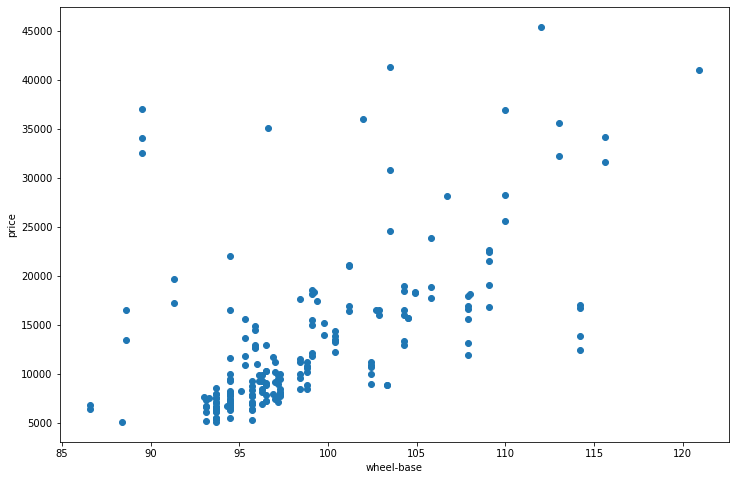

<Figure size 432x288 with 0 Axes>

In [67]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(auto_num['wheel-base'], auto_num['price'])

ax.set_xlabel('wheel-base')
ax.set_ylabel('price')
plt.show()
plt.clf()

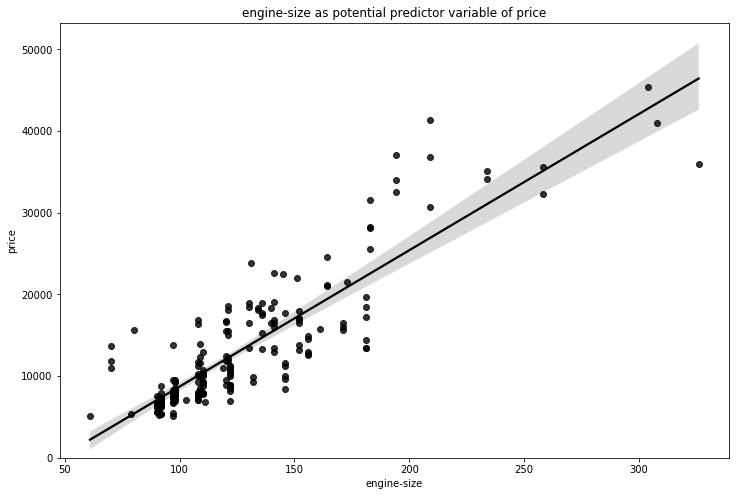

<Figure size 432x288 with 0 Axes>

In [71]:
# Engine size as potential predictor variable of price
fig, ax = plt.subplots(figsize=(12, 8))
sns.regplot(x="engine-size", y="price", data=auto_num, color = 'k', ax = ax)
ax.set_title("engine-size as potential predictor variable of price")
plt.ylim(0,)
plt.show()
plt.clf()

In [75]:
corr = auto_num[['engine-size', 'price']].corr()
corr.style.background_gradient(cmap='RdYlGn')

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


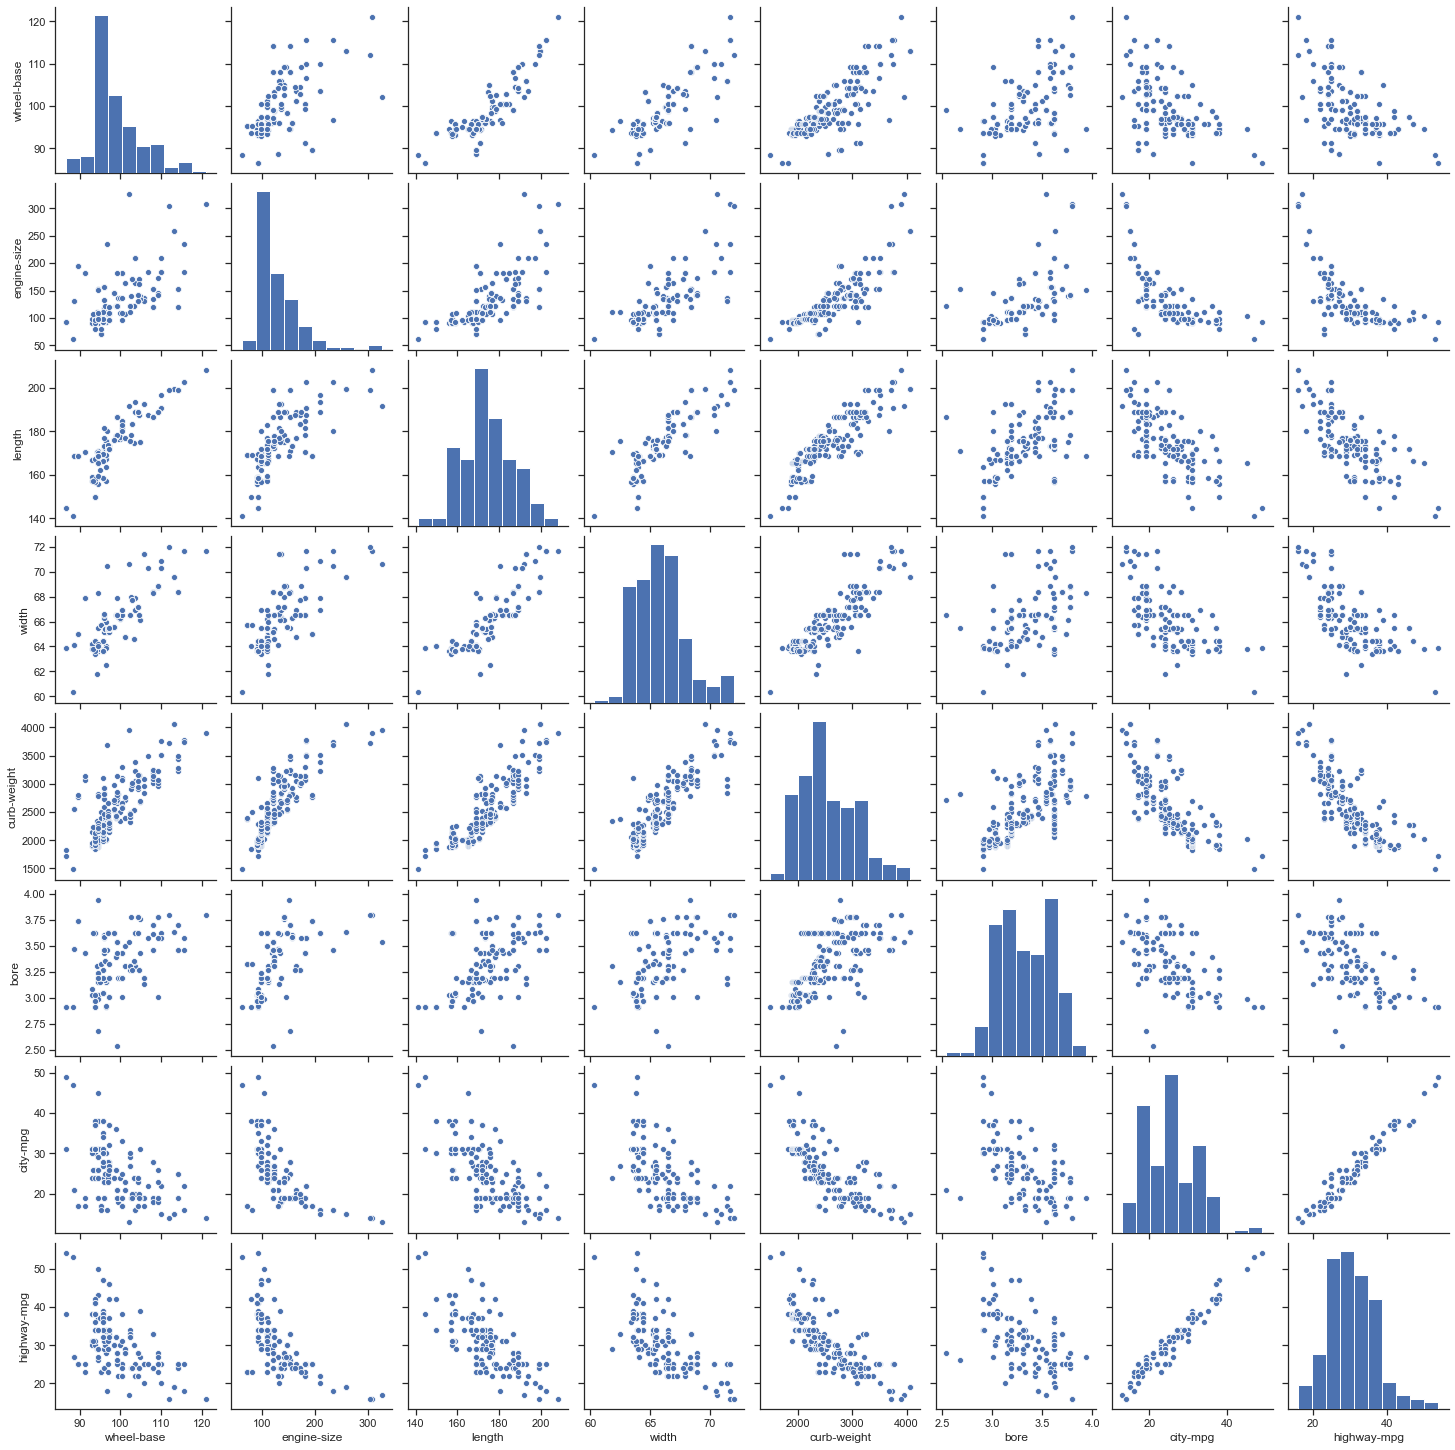

<Figure size 432x288 with 0 Axes>

In [76]:
# Matrix de dispersão
sns.set(style="ticks", color_codes=True)
g=sns.pairplot(auto_num,vars=['wheel-base', 'engine-size', 'length', 'width', 'curb-weight', 'bore', 'city-mpg', 'highway-mpg'])
plt.show()
plt.clf()

### Variaveis categóricas

In [78]:
auto_cat = auto.select_dtypes(include = [np.object])
print(auto_cat.columns)

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system', 'horsepower'],
      dtype='object')


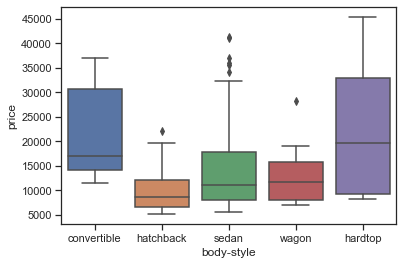

In [80]:
sns.set(style="ticks", color_codes=True)
sns.boxplot(x="body-style", y="price", data=auto)
plt.show()

Como há sobreposição entre as diferentes categorias de 'body-style', esta feature não será uma boa preditora para price.

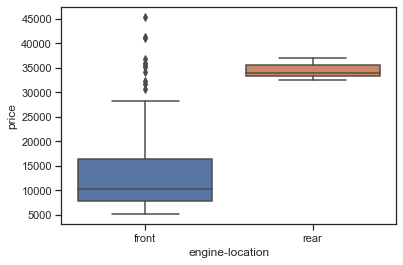

In [81]:
sns.set(style="ticks", color_codes=True)
sns.boxplot(x="engine-location", y="price", data=auto)
plt.show()

Como não há sobreposição entre estas duas categorias, a feature 'engine - location', será uma boa predetora para a variável price.

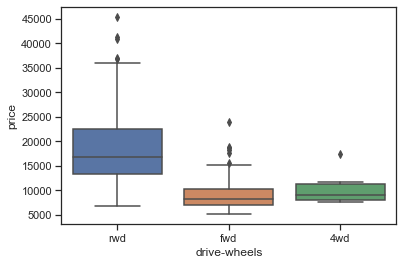

In [82]:
sns.set(style="ticks", color_codes=True)
sns.boxplot(x="drive-wheels", y="price", data=auto)
plt.show()

In [83]:
auto.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,201.0,0.840796,1.254802,-2.00,0.00,1.000000,2.00,3.00
normalized-losses,201.0,122.000000,31.996250,65.00,101.00,122.000000,137.00,256.00
wheel-base,201.0,98.797015,6.066366,86.60,94.50,97.000000,102.40,120.90
length,201.0,174.200995,12.322175,141.10,166.80,173.200000,183.50,208.10
width,201.0,65.889055,2.101471,60.30,64.10,65.500000,66.60,72.00
height,201.0,53.766667,2.447822,47.80,52.00,54.100000,55.50,59.80
curb-weight,201.0,2555.666667,517.296727,1488.00,2169.00,2414.000000,2926.00,4066.00
engine-size,201.0,126.875622,41.546834,61.00,98.00,120.000000,141.00,326.00
bore,201.0,3.330692,0.268072,2.54,3.15,3.310000,3.58,3.94
stroke,197.0,3.256904,0.319256,2.07,3.11,3.290000,3.41,4.17


In [84]:
print(auto['drive-wheels'].value_counts().to_frame())

     drive-wheels
fwd           118
rwd            75
4wd             8


In [86]:
print(auto.groupby('body-style')['price'].mean())

body-style
convertible    21890.500000
hardtop        22208.500000
hatchback       9957.441176
sedan          14459.755319
wagon          12371.960000
Name: price, dtype: float64


### ANOVA

Vamos ver se os diferentes tipos de direção - 'drive-wheels' impactam no preço.

In [90]:
grupo_1 = auto[['drive-wheels', 'price']].groupby('drive-wheels')
print(grupo_1.head(5))

    drive-wheels    price
0            rwd  13495.0
1            rwd  16500.0
2            rwd  16500.0
3            fwd  13950.0
4            4wd  17450.0
5            fwd  15250.0
6            fwd  17710.0
7            fwd  18920.0
8            fwd  23875.0
9            rwd  16430.0
10           rwd  16925.0
136          4wd   7603.0
140          4wd   9233.0
141          4wd  11259.0
144          4wd   8013.0


In [91]:
grupo_1.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [93]:
# ANOVA
f_val, p_val = stats.f_oneway(grupo_1.get_group('fwd')['price'], grupo_1.get_group('rwd')['price'])
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


### Conclusão: Variáveis importantes

variáveis numéricas:
    
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>


variável categórica:

<ul>
    <li>Drive-wheels</li>
    <li>engine-location</li>
</ul>

Ao prover variáveis com bom poder de predição, melhoramos a performance de predição do nosso modelo de Machine Learning

In [94]:
auto_df = auto.sample(frac = 1).reset_index(drop = True)
auto_df.head().T

,0,1,2,3,4
symboling,2,1,2,0,3
normalized-losses,94,118,161,122,256
make,volkswagen,dodge,mitsubishi,peugot,volkswagen
fuel-type,gas,gas,gas,diesel,gas
aspiration,std,std,std,turbo,std
num-of-doors,four,two,two,four,two
body-style,sedan,hatchback,hatchback,wagon,hatchback
drive-wheels,fwd,fwd,fwd,rwd,fwd
engine-location,front,front,front,front,front
wheel-base,97.3,93.7,93.7,114.2,94.5


In [96]:
auto.to_csv('auto_df.csv', index = False)